In [1]:
import pylab
import numpy as np

import torch
import torch.nn as nn

from academy import train, forecast, Music

## 국악 데이터를 쉽게 다룰 수 있게 만들어주는 `Music` 클래스

In [2]:
music = Music()
music.load_music('sooyeonjang_gayageum_allnode.txt')
music.load_nodelist('sooyeonjang_gayageum_nodelist.txt')

In [3]:
print(music)
print("Print the music: ", music.music)
print("==============")
print("Print the list of nodes", music.nodelist)
print("Print the index flow", music.indexed_music)

Music( length=445 num_nodes=48 )
Print the music:  [175.06 131.06 131.06 131.06 131.06 131.06 117.06 156.06 131.06 175.06
 131.06 117.06 156.06 104.06 104.04  87.02 117.06  87.06  78.06  87.06
 117.06 117.04  87.02 117.06  87.06 117.06 156.06 117.06 104.06 117.06
 156.06 117.06 156.06 117.06 131.06 175.06 156.06 117.06 156.06 117.06
 156.06 117.06 156.06 156.06 117.06 156.06 131.06 175.06 131.06 117.06
 156.06 104.06 104.04  87.02 117.06  87.06  78.06  87.06 117.06 117.04
  87.02 117.06  87.06 117.06 175.06 131.06 131.06 131.06 131.06 131.06
 117.06 156.06 131.06 175.06 131.06 117.06 156.06 104.12 104.1  156.02
 117.06 156.06 117.06 104.06 117.06 156.06 117.06 156.06 117.12 117.06
 131.06 117.06 156.06 104.12 104.1  156.02 117.06 156.1  117.02 156.06
 117.06 117.06 104.06 117.06 156.06 131.06 131.06 175.06 156.06 131.06
 131.06 156.06 131.06 131.06 117.06 175.06 233.12 208.1  175.02 156.06
 208.12 156.06 156.06 208.1  156.02 208.06 156.06 208.1  156.02 208.06
 156.06 175.06 156.06 131.

## 1. 소리의 파동을 이용한 음악 작곡

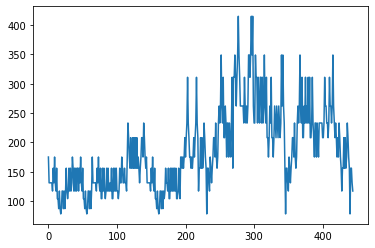

In [4]:
pylab.plot(music.music)

In [5]:
k = 10

X = []
y = []
for i in range(music.length - k):
    X.append(music.music[i:i+k] / max(music.music))
    y.append(music.music[i+k] / max(music.music))
X = np.array(X)
y = np.array(y).reshape((-1, 1))

In [6]:
hidden = 64
model = nn.Sequential(
    nn.Linear(k, hidden),
    nn.ReLU(),
    nn.Linear(hidden, hidden),
    nn.ReLU(),
    nn.Linear(hidden, 1)
)

In [13]:
train(model, X, y, epochs=500, lr=0.001)

Log:   0%|          | 0/500 [00:00<?, ?it/s]

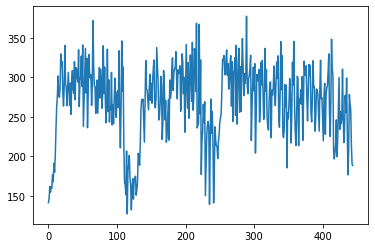

In [14]:
x = torch.from_numpy(X[0]).float()
pylab.plot(max(music.music) * forecast(model, x, music.length))

## 2. 노드를 이용한 음악 작곡

## 3. 중첩행렬을 이용한 음악 작곡